In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
iris_target = iris.target
iris_data = iris.data
iris_feature_names = iris.feature_names

iris = pd.DataFrame(iris_data, columns=iris_feature_names)
iris['target'] = iris_target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_train_df = iris.drop(columns='target')
y_train_df = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.2, random_state = 11)

In [4]:
models = list()
model_knn = KNeighborsClassifier()
model_df = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_svm = SVC(kernel = 'rbf')
models.append(model_knn)
models.append(model_df)
models.append(model_rf)
models.append(model_svm)

for model in models:
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, model_pred)
    print(f'{model} 모델 정확도 : {accuracy : .4f}')


KNeighborsClassifier() 모델 정확도 :  0.9667
DecisionTreeClassifier() 모델 정확도 :  0.8667
RandomForestClassifier() 모델 정확도 :  0.9333
SVC() 모델 정확도 :  0.9333


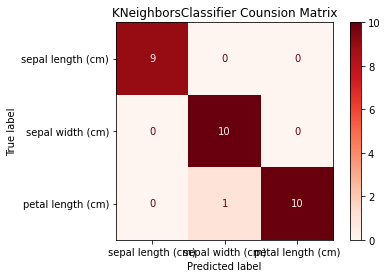

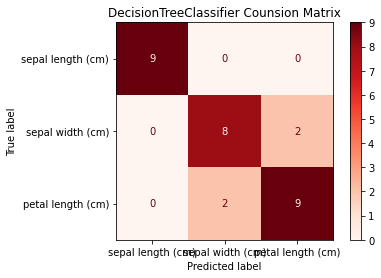

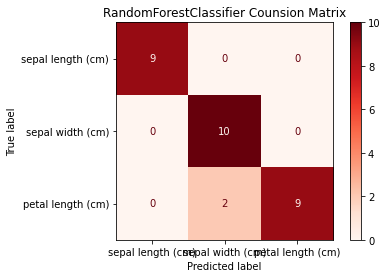

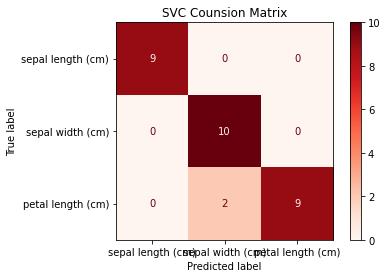

In [5]:
for model in models:
    disp = plot_confusion_matrix(model,
                                X_test, y_test,
                                display_labels=iris_feature_names,
                                cmap=plt.cm.Reds)
    
    disp.ax_.set_title(str(model)[:-2] + ' Counsion Matrix')


## 모델 별 교차검증 
사이킷런 모듈인 `cross_val_score` 을 이용

In [6]:
from sklearn.model_selection import cross_val_score

In [21]:
for model in models:
    score = cross_val_score(model, iris_data, iris_target, cv=5)
    print(str(model)[:-2], ' 교차검증 평균 :', score.mean())    

KNeighborsClassifier  교차검증 평균 : 0.9733333333333334
DecisionTreeClassifier  교차검증 평균 : 0.9666666666666668
RandomForestClassifier  교차검증 평균 : 0.96
SVC  교차검증 평균 : 0.9666666666666666


## KFold 상세조정
단순 cross_val_score을 이용하면 KFold의 매개변수를 제어할 수 없으므로 따로 KFold 객체를 만들어서 cv 매개변수로 사용

In [23]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)
for model in models:
    score = cross_val_score(model, iris_data, iris_target, cv=kfold)
    print(str(model)[:-2], '교차검증 평균 :', score.mean())

KNeighborsClassifier 교차검증 평균 : 0.9666666666666666
DecisionTreeClassifier 교차검증 평균 : 0.9400000000000001
RandomForestClassifier 교차검증 평균 : 0.9466666666666667
SVC 교차검증 평균 : 0.9800000000000001


### 계층별 교차검증
데이터가 편향되어 있을경우 `stratified k-fold cross-validation` 을 이용하면 더 괜찮은 성능을 가질수 있다